**FAKE AND REAL NEWS **

This dataset has 17903 uniques news titles and their corresponding text. 
It has been categorized into two .csv files, one for True and the other one for Fake.

Our aim to to train a model to predict if a particular news is real of fake

**1) IMPORT ALL LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import csv
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


**2) DATA PREPROCESSING**

Let us import the two csv files

In [2]:
true=pd.read_csv('C:\\Users\\Naren\\Documents\\Codes\\fake-and-real-news-dataset\\True.csv')

fake=pd.read_csv('C:\\Users\\Naren\\Documents\\Codes\\fake-and-real-news-dataset\\Fake.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


We will categorise the news into true=1 and fake=0

In [3]:
true['result']=1
fake['result']=0

In [4]:
true.head()

,title,text,subject,date,result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Let us concatenate these two dataframes

In [5]:
df=pd.concat([true,fake])
df.tail()

,title,text,subject,date,result
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


We have no null values

In [6]:
df.isna().sum()

title      0
text       0
subject    0
date       0
result     0
dtype: int64

In [7]:
df['text']=df['title']+""+df['text']+""+df['subject']
del df['title']
del df['date']
del df['subject']
df.head()

,text,result
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [8]:
sentence = df['text'].values.tolist()
result= df['result'].values.tolist()


**3) TRAIN TEST SPLIT**

We have a split size of 0.2, hence 20% of the data will be used for testing.

In [9]:
X_train, X_test, Y_train,Y_test= train_test_split(sentence, result, test_size=0.2)


In [10]:
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

**4) NLP TECHNIQUES**

Tokenization: is the process of tokenizing or splitting a string, text into a list of tokens. One can think of token as parts like a word is a token in a sentence, and a sentence is a token in a paragraph.

Padding: When processing sequence data, it is very common for individual samples to have different lengths. Hence, we pad the sequences to make an array with each row being the vectorized values of each sentence.

In [11]:
tokenizer=Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(X_train)
padded_train=pad_sequences(sequences,5000,truncating='post')




In [12]:
sequences_test=tokenizer.texts_to_sequences(X_test)
padded_test=pad_sequences(sequences_test,5000,truncating='post')


In [13]:
padded_test.shape

(8980, 5000)

In [14]:
Y_test.shape

(8980,)

5) CONVOLUTIONAL NEURAL NETWORK

In [15]:
model= tf.keras.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length=5000),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5000, 16)          160000    
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0         
_________________________________________________________________
dense (Dense)                (None, 6)                 480006    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 640,013
Trainable params: 640,013
Non-trainable params: 0
_________________________________________________________________


In [17]:
history=model.fit(padded_train, Y_train, epochs=10, validation_data=(padded_test, Y_test))


Train on 35918 samples, validate on 8980 samples
Epoch 1/10
35918/35918 [==============================] - 76s 2ms/sample - loss: 0.5863 - accuracy: 0.5972 - val_loss: 0.0064 - val_accuracy: 0.9989
Epoch 2/10
35918/35918 [==============================] - 72s 2ms/sample - loss: 0.0014 - accuracy: 0.9999 - val_loss: 4.4554e-04 - val_accuracy: 1.0000
Epoch 3/10
35918/35918 [==============================] - 70s 2ms/sample - loss: 1.3643e-04 - accuracy: 0.9999 - val_loss: 3.4899e-04 - val_accuracy: 1.0000
Epoch 4/10
35918/35918 [==============================] - 62s 2ms/sample - loss: 3.0407e-05 - accuracy: 1.0000 - val_loss: 2.6504e-04 - val_accuracy: 1.0000
Epoch 5/10
35918/35918 [==============================] - 65s 2ms/sample - loss: 1.4778e-05 - accuracy: 1.0000 - val_loss: 2.4714e-04 - val_accuracy: 1.0000
Epoch 6/10
35918/35918 [==============================] - 67s 2ms/sample - loss: 7.4146e-06 - accuracy: 1.0000 - val_loss: 2.0534e-04 - val_accuracy: 1.0000
Epoch 7/10
35918/3591

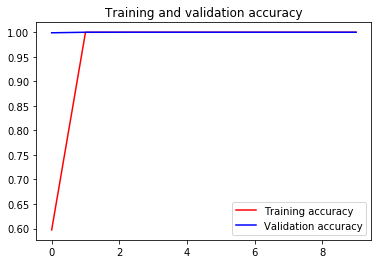

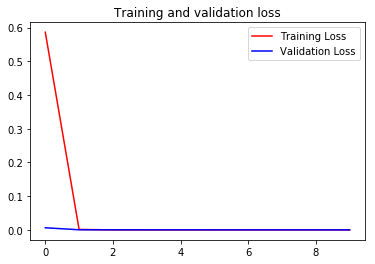

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

We have a great accuracy with just about 3 epochs!

This dataset can be found on Kaggle.